### Segmentação por Watershed

In [2]:
import cv2
import numpy as np

from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed

import matplotlib.pyplot as plt

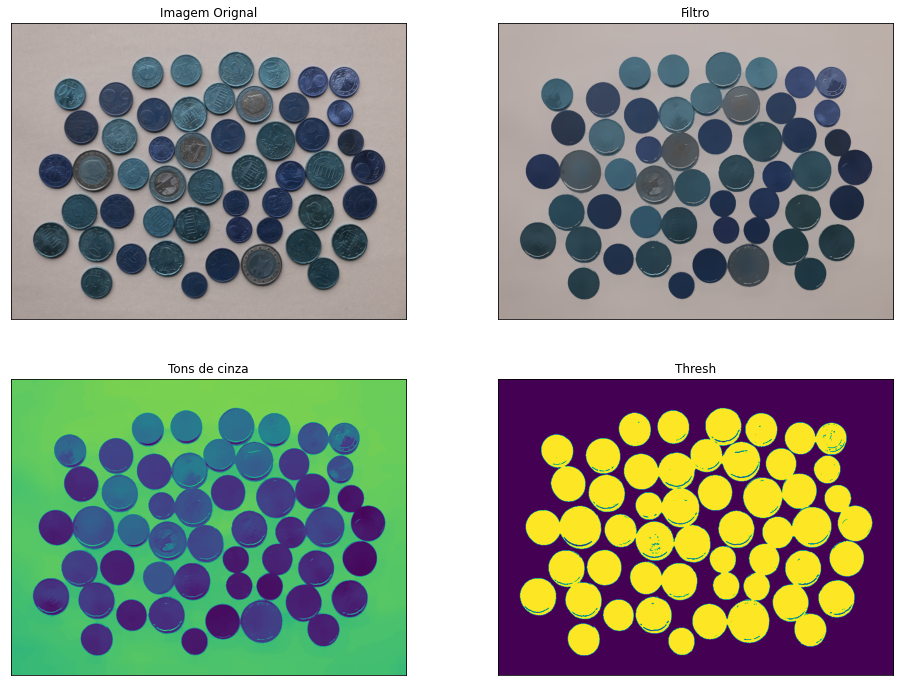

In [3]:
img = cv2.imread(r'C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\006-object segmentation\images\coins.jpg')

# filtro para preservação de borda de imagem
# frequentemente usado para remover ruídos antes da segmentação por watershed
filtro = cv2.pyrMeanShiftFiltering(img, 20, 40)

gray = cv2.cvtColor(filtro, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

titulos = ['Imagem Orignal', 'Filtro', 'Tons de cinza', 'Thresh']
imagens = [img, filtro, gray, thresh]

fig = plt.gcf()
fig.set_size_inches(16, 12)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(imagens[i])
    plt.title(titulos[i])
    plt.xticks([]), plt.yticks([])
plt.show()

#### Preenchimento dos buracos na imagem binária

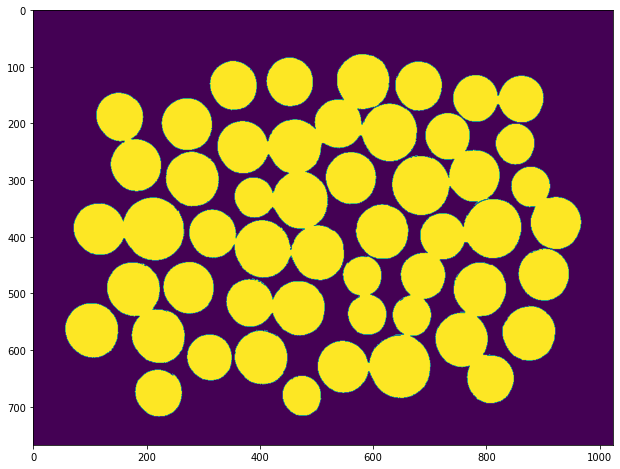

In [4]:
contornos, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
buracos = []
for con in contornos:
    area = cv2.contourArea(con)
    if area < 1000:
        buracos.append(con)
cv2.drawContours(thresh, buracos, -1, 255, -1)

fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.imshow(thresh)

#### Cálculo da distância da transformação
ndi.distance_transform_edt

    - src - imagem de entrada
    - dst - imagem de saída
    - distanceType - variável que representa o tipo de transformação de distância
    - maskSize - variável que representa o tamanho da máscara (geralmente é definida com um valor 3)

Para o parâmetro distanceType, podemos escolher vários tipos diferentes de transformada de distância. Em nosso código, estamos usando uma distância euclidiana simples. No exemplo a seguir, você pode ver alguns outros tipos de transformações de distância.

    - DIST_USER - distância definida pelo usuário
    - DIST_L1 - (distância = |x1 - x2| + |y1 - y2|)
    - DIST_L2 - a distância euclidiana simples
    - DIST_C - (distância = max(|x1 - x2|, |y1 - y2|))


In [5]:
dist = ndi.distance_transform_edt(thresh, cv2.DIST_L2)
dist_visual = dist.copy()

#### Encontrando os pontos máximos locais
O próximo passo é encontrar as coordenadas dos picos (máximos locais) das áreas brancas na imagem. Para isso, usaremos a função 'peak_local_max()' da biblioteca Scikit-image. Vamos aplicar esta função à nossa 'distance_transform' imagem e saída nos dará os marcadores que serão usados na função watershed

In [6]:
local_max = peak_local_max(dist, indices=False, min_distance=20, labels=thresh)

C:\Users\shuel\AppData\Local\Temp\ipykernel_17316\1469441586.py:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(dist, indices=False, min_distance=20, labels=thresh)


#### Marcando os Labels

In [7]:
markers = ndi.label(local_max, structure=np.ones((3, 3)))[0]

#### Watershed
A etapa final é aplicar a skimage.segmentation.watershed() função da biblioteca Scikit-image.

Como parâmetros, precisamos passar nossa imagem de transformação de distância invertida e os marcadores que calculamos na linha de código anterior.

Como o algoritmo de watershe assume que nssos marcadores representam mínimos locais, precisamos inverter nossa imagem de transformada de distância. Dessa forma, pixels claros representarão elevações altas, enquanto pixels escuros representarão elevações baixas para a transformada de bácia

In [9]:
labels = watershed(-dist, markers, mask=thresh)

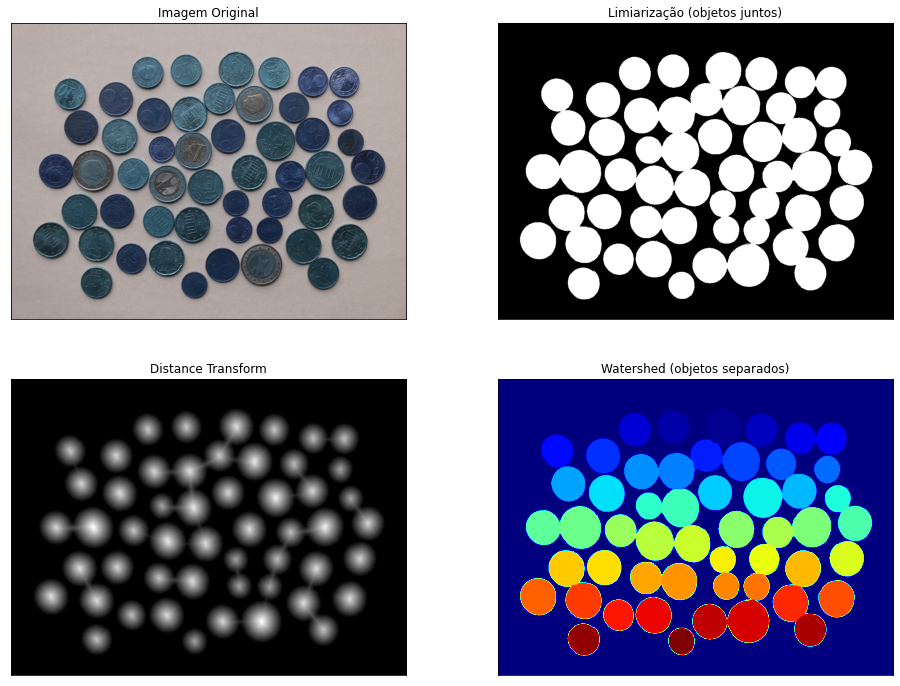

In [10]:
titulos = [
    'Imagem Original', 
    'Limiarização (objetos juntos)',
    'Distance Transform',
    'Watershed (objetos separados)' 
    ]
imagens = [
    img,
    thresh,
    dist_visual,
    labels
]

fig = plt.gcf()
fig.set_size_inches(16, 12)
for i in range(4):
    plt.subplot(2,2,i+1)
    # condição para colocar colormap jet apenas para imagem com resultado do watershed
    if (i == 3):
        cmap = "jet"
    else:
        cmap = "gray"
    plt.imshow(imagens[i], cmap)
    plt.title(titulos[i])
    plt.xticks([]), plt.yticks([])
plt.show()